In [2]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from heisenberg_hqa import run_heisenberg_hqa_from_datafile, datafile_to_dataframe, test_hqa
import seaborn as sns

/home/maiyuren/anaconda3/envs/quantum_computing/lib/python3.7/site-packages/qiskit/validation/fields/custom.py:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.integer, numpy.float,


Taking 5 qubits
No such device.
Availability of gpu: False


### Load Data

In [123]:
# Loading data
data = datafile_to_dataframe("state_files/data_n_qubits-6.pkl")
data = data[data.depth==4]
distributions = np.array(data.statevector.to_list())
characteristics = np.array([[j]+ i for i, j in zip(data.Jlist.tolist(), data.depth.tolist())])

## Train model

In [12]:
model = run_heisenberg_hqa_from_datafile("data.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'data.pkl'

## Load model

In [14]:
filename = "pickled_models/hqa_model_ver_1.pickle"
with open(filename, "rb") as f:
    model = pickle.load(f)
model.reset_q_circs()

# Analysis

In [124]:
# Testing the HQA
test_results = test_hqa(model, 50, distributions)

100%|██████████| 50/50 [00:06<00:00,  8.21it/s]

Average Loss: 0.0001087825987198398


In [129]:
# Creating the vectors
model.create_latent_vectors(distributions, characteristics)
model.pca_transform_latent_vectors(3, True)
model.dataframe_latent_points('heisenberg')
model.latent_landscape(0,1)

10it [00:00, 21.64it/s]


Variance explained by each principal component:
[95.19374361378642, 4.7439586351790775, 0.062273748247549505, 2.3955582695563814e-05, 4.1698861563197686e-08, 5.3605723482813505e-09, 1.3877861015973193e-10, 6.053038086635544e-12]



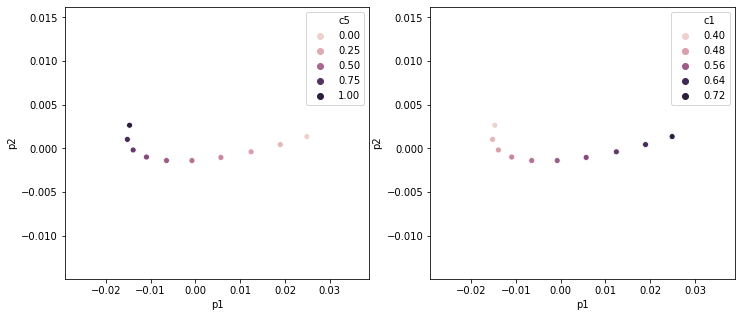

In [134]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
ax = sns.scatterplot(x="p1", y="p2", hue='c5', data=model.df_latent_vectors, ax=axs[0])
ax = sns.scatterplot(x="p1", y="p2", hue='c1', data=model.df_latent_vectors, ax=axs[1])

In [36]:
model.df_latent_vectors

,depth,ham_indx,latent_vector,p1,p2
0,1.0,0.52961,"[-1.9222362, 0.01785163, -0.0006903503]",-1.922236,0.017852
1,2.0,0.52961,"[-1.9054637, 0.01621604, -0.00043154572]",-1.905464,0.016216
2,3.0,0.52961,"[-1.9054644, 0.016216172, -0.00043173207]",-1.905464,0.016216
3,4.0,0.52961,"[-1.9054565, 0.016215526, -0.00043136193]",-1.905457,0.016216
4,5.0,0.52961,"[-1.9054573, 0.016215445, -0.0004314605]",-1.905457,0.016215
...,...,...,...,...,...
95,1.0,0.42629,"[2.043962, 0.012561013, 0.0016336389]",2.043962,0.012561
96,2.0,0.42629,"[1.8132207, 0.009912527, -0.001588899]",1.813221,0.009913
97,3.0,0.42629,"[1.8132176, 0.009912379, -0.001589098]",1.813218,0.009912
98,4.0,0.42629,"[1.8132205, 0.009912504, -0.0015888693]",1.813221,0.009913


# Regression Analysis

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [121]:
X = model.latent_vectors
y = characteristics[:, 2]
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3)

# Models
reg_lin = LinearRegression().fit(X, y)
reg_svm = svm.SVR().fit(X, y)
reg_ridge = Ridge(alpha=0.1).fit(X, y)

In [122]:
print("Linear reg score =", reg_lin.score(X_test, y_test))
print("SVM reg score    =", reg_svm.score(X_test, y_test))
print("Ridge reg score  =", reg_ridge.score(X_test, y_test))

Linear reg score = 0.4508311580245392
SVM reg score    = -0.0032948205076288595
Ridge reg score  = 0.02291621531842225


In [52]:
print("actual, predictied")
yy = reg_lin.predict(X)
list(zip(y, yy))

actual, predictied


[(0.5296100742654171, 0.5389404),
 (0.7783281108411285, 0.70129395),
 (0.23226337576073464, 0.34033203),
 (0.07216614826370105, 0.21789551),
 (0.4559811676937289, 0.6052246),
 (0.32062614689725544, 0.5789795),
 (0.06958569965991313, 0.012207031),
 (0.873196809831442, 0.8031006),
 (0.9372647939470479, 0.6647949),
 (0.2616804816777185, 0.6107178),
 (0.0125955578039455, -0.012329102),
 (0.9552008424902976, 0.6972656),
 (0.6214749208688178, 0.65966797),
 (0.19446018303289425, 0.37243652),
 (0.042205403849355894, 0.43359375),
 (0.3490034928844965, 0.31982422),
 (0.8614392050149691, 0.70654297),
 (0.5270164644173145, 0.72717285),
 (0.34069955879817426, 0.42077637),
 (0.4262896323332468, 0.390625),
 (0.1681441080260423, 0.34240723),
 (0.25466053043094183, 0.18127441),
 (0.7896891717173742, 0.63720703),
 (0.1805690479099914, 0.12390137),
 (0.9097741063764532, 0.7327881),
 (0.54258746548596, 0.4798584),
 (0.9164898730842643, 0.6879883),
 (0.0961329153660545, 0.05053711),
 (0.25027538382481285, 